# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [56]:
import pandas as pd
import numpy as np

# for visualizing data
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(8,6) # set default figsize
import seaborn as sns

# For randomized data splitting
from sklearn.model_selection import train_test_split

# To build linear regression_model
import statsmodels.api as sm

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the dataset

In [2]:
# mount Google drive
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# load dataset from Google drive
# df = pd.read_csv('/content/drive/MyDrive/DSBA/project03/used_device_data.csv')

# load dataset locally
df = pd.read_csv('used_device_data.csv')

In [4]:
# make copy of original
df_copy = df.copy()

## Data Overview

- Observations
- Sanity checks

In [5]:
# preview data
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

* 4 categorical variables, 11 numeric variables

In [7]:
# statistical summary of numeric values
df.describe()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454.000000,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,4.364712,5.233107
std,3.805280,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,0.588914,0.683637
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342
50%,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,6.619433,7.847841


## Exploratory Data Analysis (EDA)

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

### Univariate Analysis

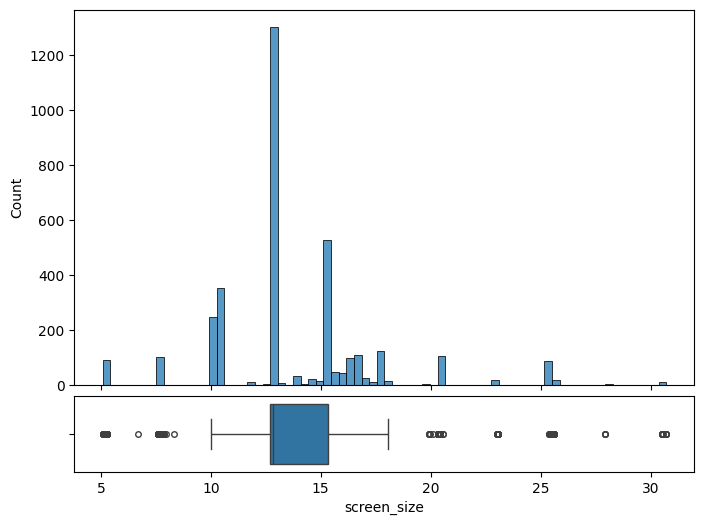

In [8]:
# create plot grid
fig = plt.figure()
gs = fig.add_gridspec(nrows=2, hspace=0.05, height_ratios=(5, 1))
axs = gs.subplots(sharex=True)

# hist plot
sns.histplot(data=df,x='screen_size',ax=axs[0])

# box plot
sns.boxplot(data=df,x='screen_size',ax=axs[1], fliersize=4)

plt.show()

* Majority of phones have a screen size of about 13cm

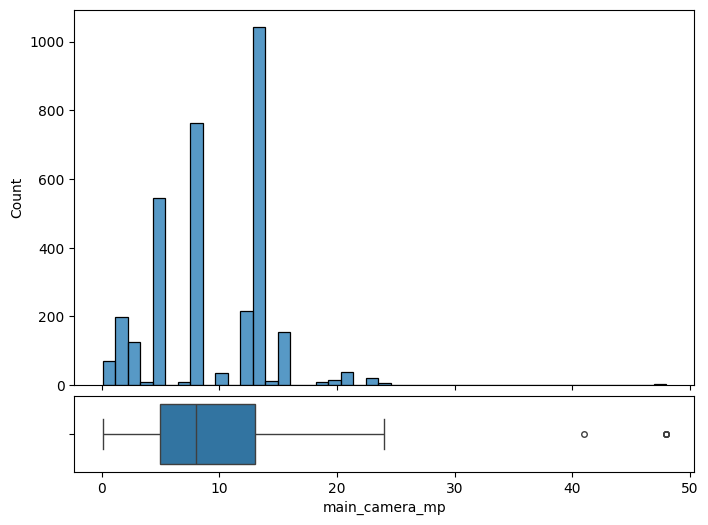

In [9]:
# create plot grid
fig = plt.figure()
gs = fig.add_gridspec(nrows=2, hspace=0.05, height_ratios=(5, 1))
axs = gs.subplots(sharex=True)

# hist plot
sns.histplot(data=df,x='main_camera_mp',ax=axs[0])

# box plot
sns.boxplot(data=df,x='main_camera_mp',ax=axs[1], fliersize=4)

plt.show()

* Median amount of main camera megapixels is 8.
* There are a few outliers with very high megapixel main cameras.

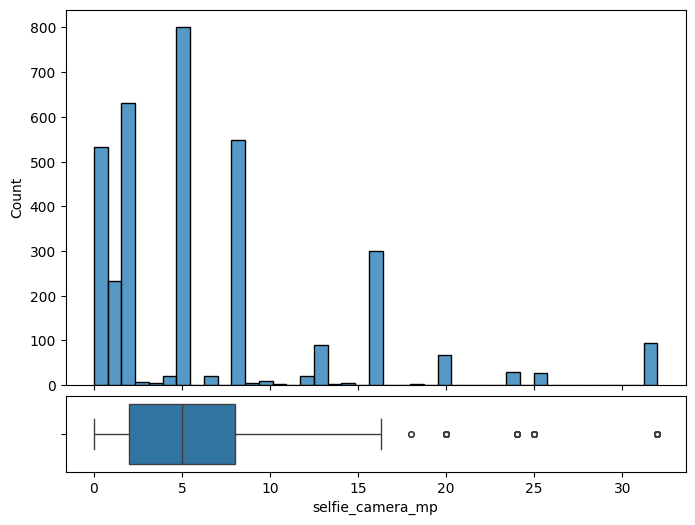

In [10]:
# create plot grid
fig = plt.figure()
gs = fig.add_gridspec(nrows=2, hspace=0.05, height_ratios=(5, 1))
axs = gs.subplots(sharex=True)

# hist plot
sns.histplot(data=df,x='selfie_camera_mp',ax=axs[0])

# box plot
sns.boxplot(data=df,x='selfie_camera_mp',ax=axs[1], fliersize=4)

plt.show()

* Median amount of selfie camera megapixels is 5.
* There are a few outliers with very high megapixel selfie cameras.

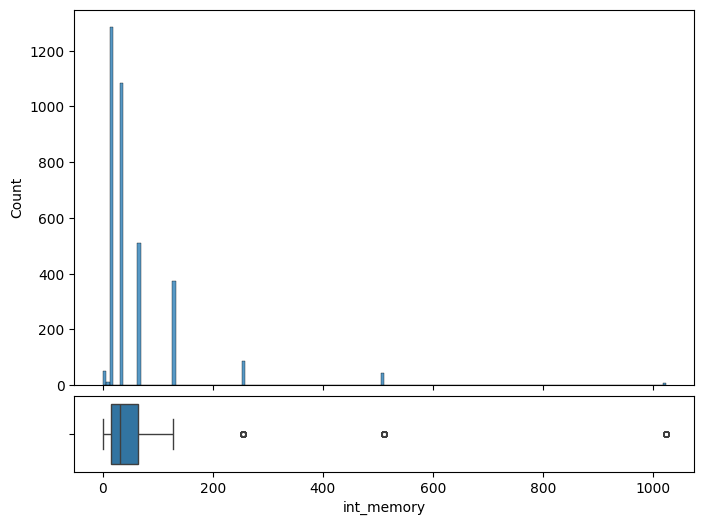

In [11]:
# create plot grid
fig = plt.figure()
gs = fig.add_gridspec(nrows=2, hspace=0.05, height_ratios=(5, 1))
axs = gs.subplots(sharex=True)

# hist plot
sns.histplot(data=df,x='int_memory',ax=axs[0])

# box plot
sns.boxplot(data=df,x='int_memory',ax=axs[1], fliersize=4)

plt.show()

* Distribution of internal memory is highly right skewed, with outliers of over 10 times the median amount of internal memory.

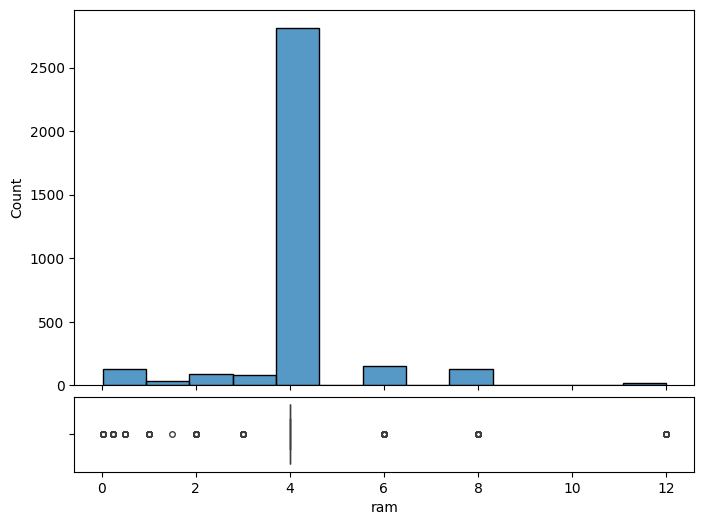

In [12]:
# create plot grid
fig = plt.figure()
gs = fig.add_gridspec(nrows=2, hspace=0.05, height_ratios=(5, 1))
axs = gs.subplots(sharex=True)

# hist plot
sns.histplot(data=df,x='ram',ax=axs[0])

# box plot
sns.boxplot(data=df,x='ram',ax=axs[1], fliersize=4)

plt.show()

* Most phones have 4gb ram, although there are some outliers with lower and higher amounts of ram.

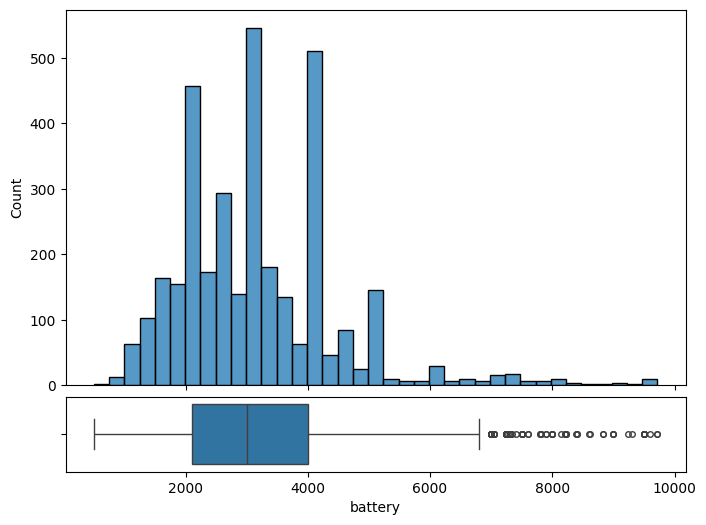

In [13]:
# create plot grid
fig = plt.figure()
gs = fig.add_gridspec(nrows=2, hspace=0.05, height_ratios=(5, 1))
axs = gs.subplots(sharex=True)

# hist plot
sns.histplot(data=df,x='battery',ax=axs[0])

# box plot
sns.boxplot(data=df,x='battery',ax=axs[1], fliersize=4)

plt.show()

* Median battery size is about 3000 mAh.
* Distrubution is heavily right skewed, mainly outliers with >=7000 mAh batteries.

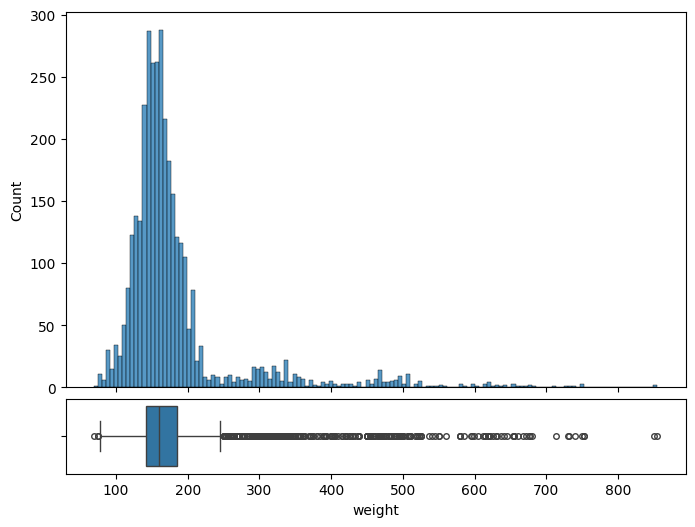

In [14]:
# create plot grid
fig = plt.figure()
gs = fig.add_gridspec(nrows=2, hspace=0.05, height_ratios=(5, 1))
axs = gs.subplots(sharex=True)

# hist plot
sns.histplot(data=df,x='weight',ax=axs[0])

# box plot
sns.boxplot(data=df,x='weight',ax=axs[1], fliersize=4)

plt.show()

* Distribtion heavily right skewed.
* Median weight of phones is just over 150 grams.

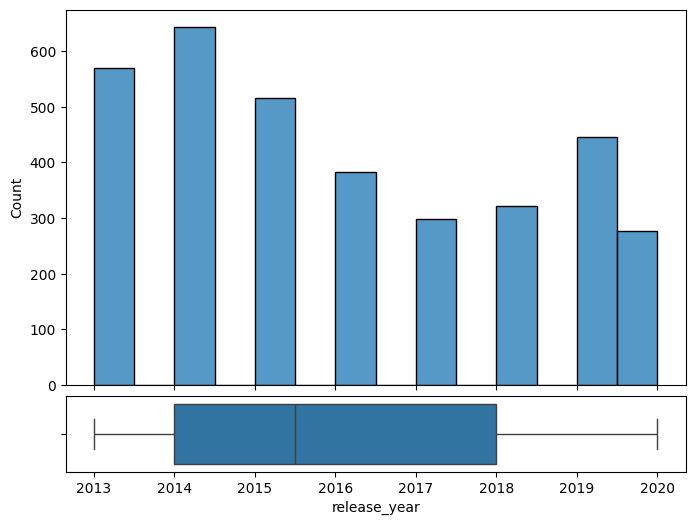

In [15]:
# create plot grid
fig = plt.figure()
gs = fig.add_gridspec(nrows=2, hspace=0.05, height_ratios=(5, 1))
axs = gs.subplots(sharex=True)

# hist plot
sns.histplot(data=df,x='release_year',ax=axs[0])

# box plot
sns.boxplot(data=df,x='release_year',ax=axs[1], fliersize=4)

plt.show()

* Most phones were released between 2014 and 2018

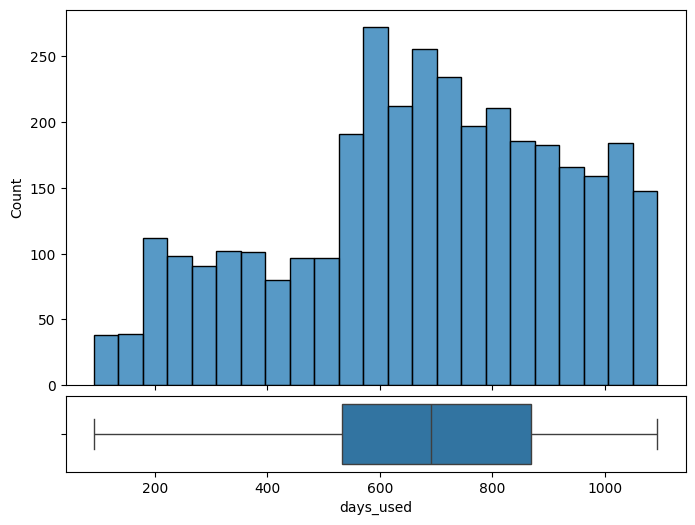

In [16]:
# create plot grid
fig = plt.figure()
gs = fig.add_gridspec(nrows=2, hspace=0.05, height_ratios=(5, 1))
axs = gs.subplots(sharex=True)

# hist plot
sns.histplot(data=df,x='days_used',ax=axs[0])

# box plot
sns.boxplot(data=df,x='days_used',ax=axs[1], fliersize=4)

plt.show()

* Majority of phones have been used between 500 and 900 days

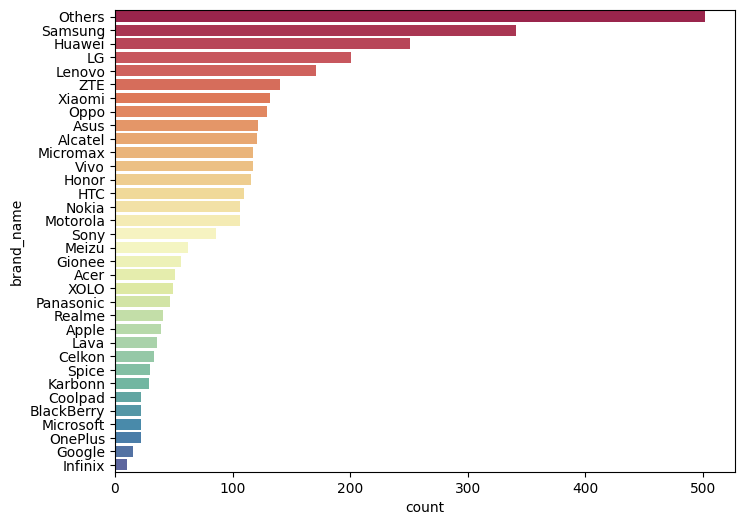

In [17]:
# get list of brand names, sorted by count in descending order
ordered_list = df['brand_name'].value_counts().index

sns.countplot(
    data=df,
    y='brand_name',
    hue='brand_name',
    order=ordered_list, # set order of categories, limit to 10
    hue_order=ordered_list, # sets order for hue
    palette='Spectral'
)

plt.show()

* Samsung has the highest count of the brand names that aren't in the 'Other' category
* Huawei is also very popular

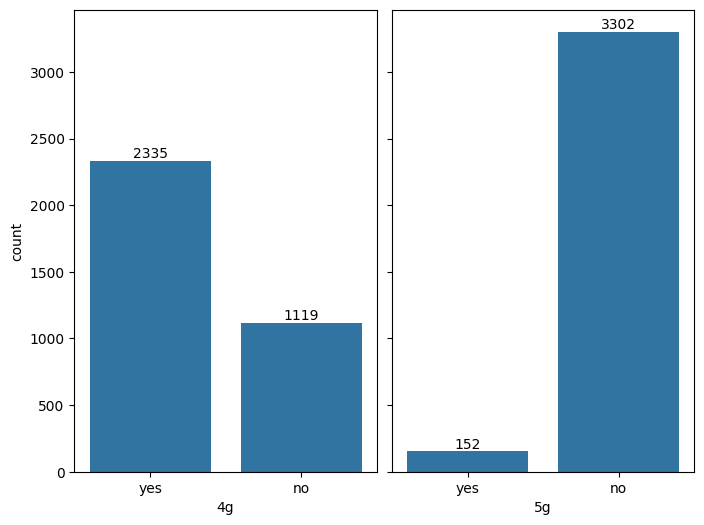

In [18]:
# create plot grid
fig = plt.figure()
gs = fig.add_gridspec(ncols=2, wspace=0.05)
axs = gs.subplots(sharey=True)

# count plot for 4g
ax1 = sns.countplot(data=df,x='4g',ax=axs[0],order=['yes','no'])

# count plot for 5g
ax2 = sns.countplot(data=df,x='5g',ax=axs[1],order=['yes','no'])

ax1.bar_label(ax1.containers[0])
ax2.bar_label(ax2.containers[0])

plt.show()

* Not many phones have 5g capability, while the majority of phones do have 4g capability.

#### 1. What does the distribution of normalized used device prices look like?

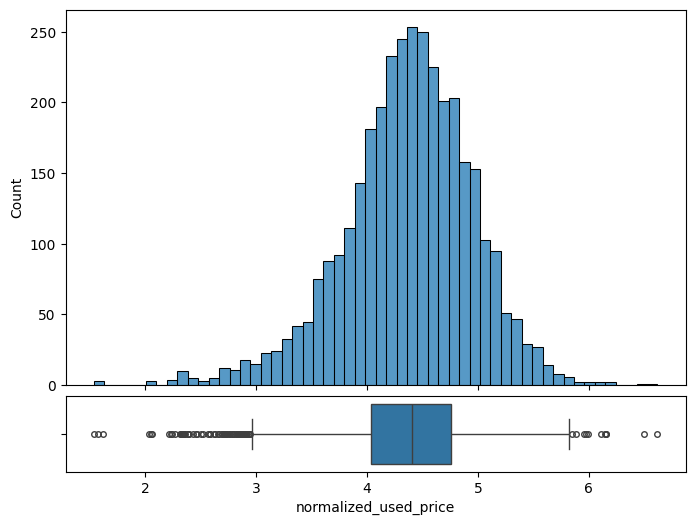

In [19]:
# create plot grid
fig = plt.figure()
gs = fig.add_gridspec(nrows=2, hspace=0.05, height_ratios=(5, 1))
axs = gs.subplots(sharex=True)

# hist plot
sns.histplot(data=df,x='normalized_used_price',ax=axs[0])

# box plot
sns.boxplot(data=df,x='normalized_used_price',ax=axs[1], fliersize=4)

plt.show()

* Distribution is fairly normal.

#### 2. What percentage of the used device market is dominated by Android devices?

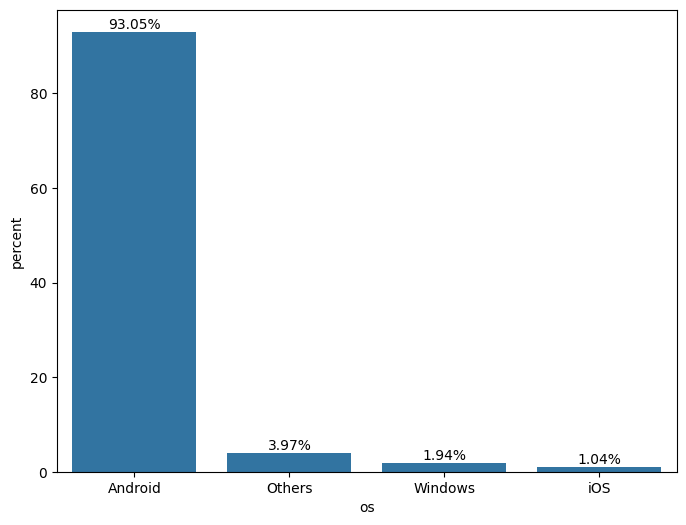

In [20]:
# get list of os, sorted by count in descending order
ordered_list = df['os'].value_counts().index

plt.figure()
ax = sns.countplot(
    data=df,
    x='os',
    stat='percent',
    order=ordered_list # set order of categories
)

ax.bar_label(ax.containers[0], fmt='%.2f%%') # add labels of counts to bars

plt.show()

* Android dominates the phone market, accounting for 93% of the devices.

### Bivariate Analysis

#### 3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?

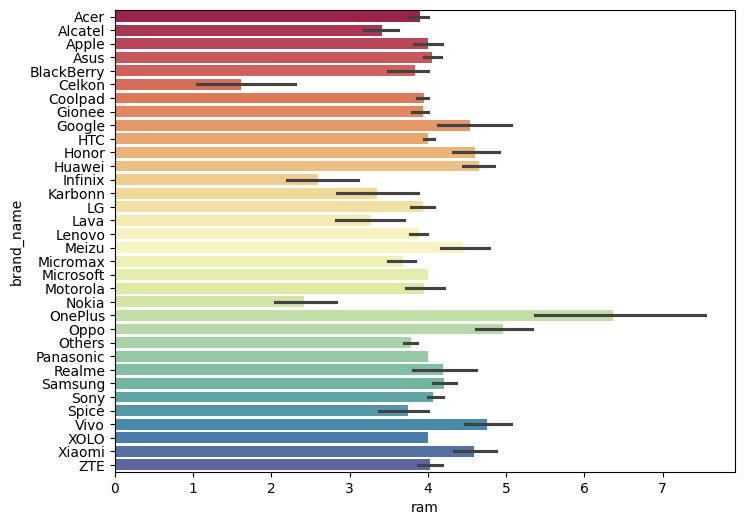

In [21]:
# get list of brand names, sorted alphabetically
ordered_list = sorted(df['brand_name'].unique())

sns.barplot(
    data=df,
    x='ram',
    y='brand_name',
    hue='brand_name',
    order=ordered_list, # set order of categories
    hue_order=ordered_list, # sets order for hue
    palette='Spectral'
)

plt.show()

* OnePlus phones have the highest amount of ram

#### 4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

<Axes: xlabel='weight', ylabel='battery'>

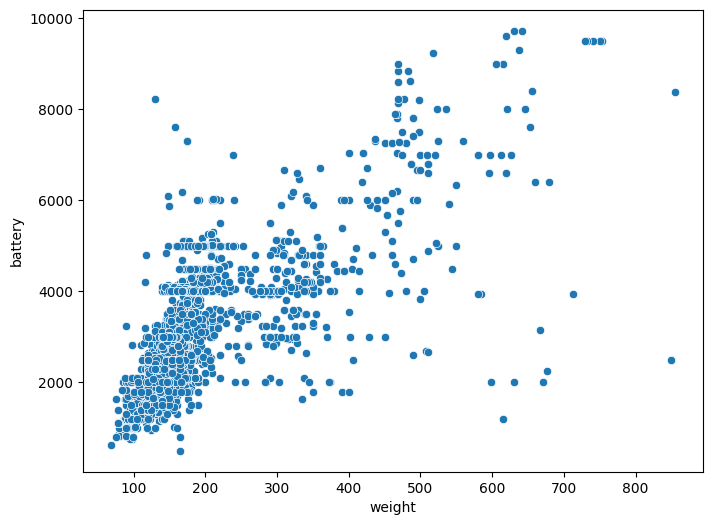

In [22]:
sns.scatterplot(data=df, x='weight', y='battery')

* There is a positive correlation between battery and weight

**Let's check for other possible correlations with weight**

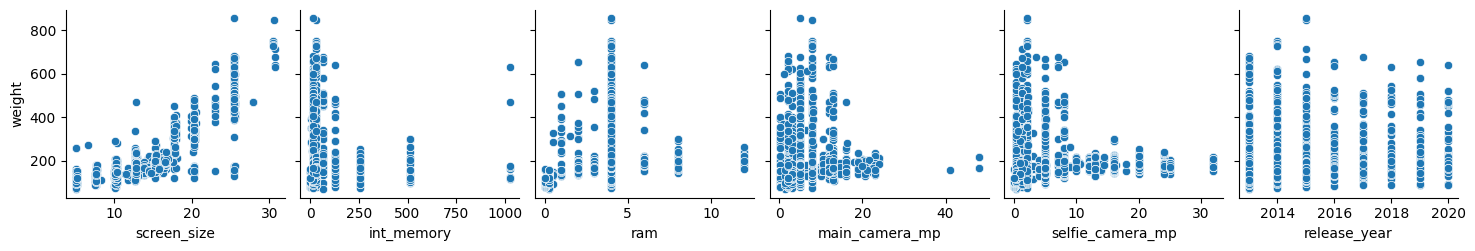

In [23]:
g = sns.pairplot(data=df, x_vars=['screen_size','int_memory','ram','main_camera_mp',
                                  'selfie_camera_mp','release_year'], y_vars='weight')
plt.show()

* There is a positive correlation between weight with screen_size
* There are no obvious patterns of correlation with the other variables.

#### 5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

<Axes: xlabel='count', ylabel='brand_name'>

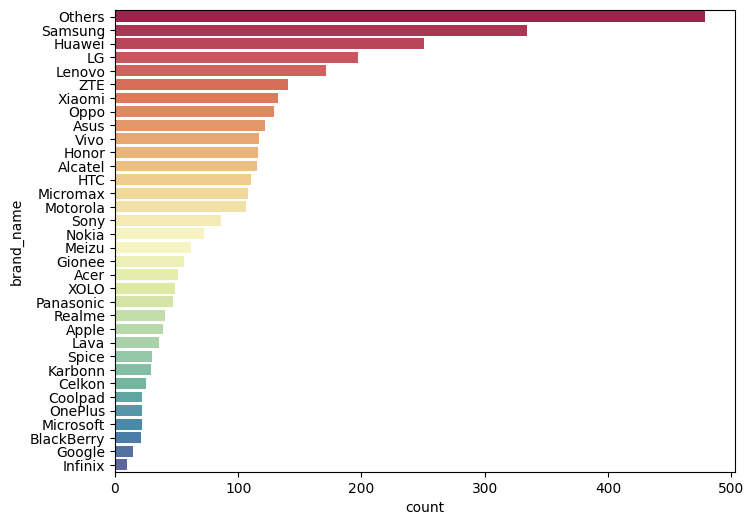

In [24]:
# get list of brand names with screen size > 6
brands_big_screen = df['brand_name'][df['screen_size']>6]

# sort list by count in descending order
ordered_list = brands_big_screen.value_counts().index

sns.countplot(
    data=df,
    y=brands_big_screen,
    hue=brands_big_screen,
    order=ordered_list,
    hue_order=ordered_list,
    palette='Spectral'
)

* The biggest phone screens are in the 'Others' category of brand
* Samsung, Huawei, and LG have the largest screens of the listed brands.

#### 6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?

<Axes: xlabel='count', ylabel='brand_name'>

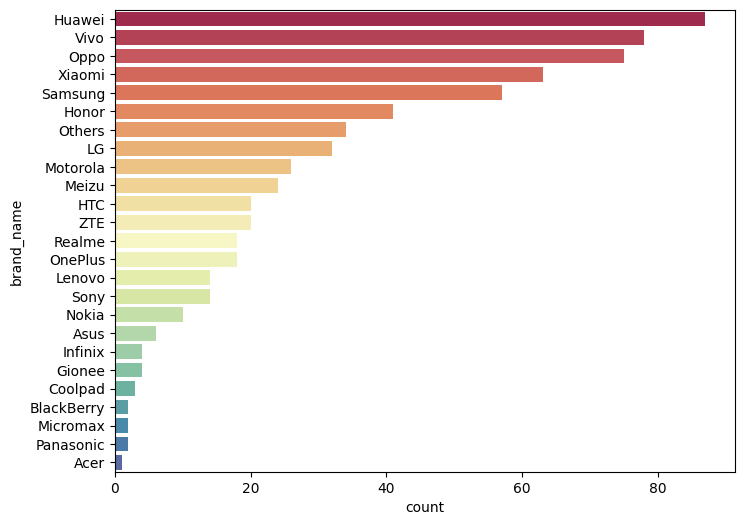

In [25]:
# get list of brand names with >8MP selfie cameras
brand_list = df['brand_name'][df['selfie_camera_mp']>8]

ordered_list = df['brand_name'][df['selfie_camera_mp']>8].value_counts().index

sns.countplot(
    data=df,
    y=brand_list,
    hue=brand_list,
    order=ordered_list,
    hue_order=ordered_list,
    palette='Spectral'
)

* Huawei, Vivo, Oppo, Xiaomi, and Samsung have the highest amount of high megapixel phones.

#### 7. Which attributes are highly correlated with the normalized price of a used device?

<Axes: >

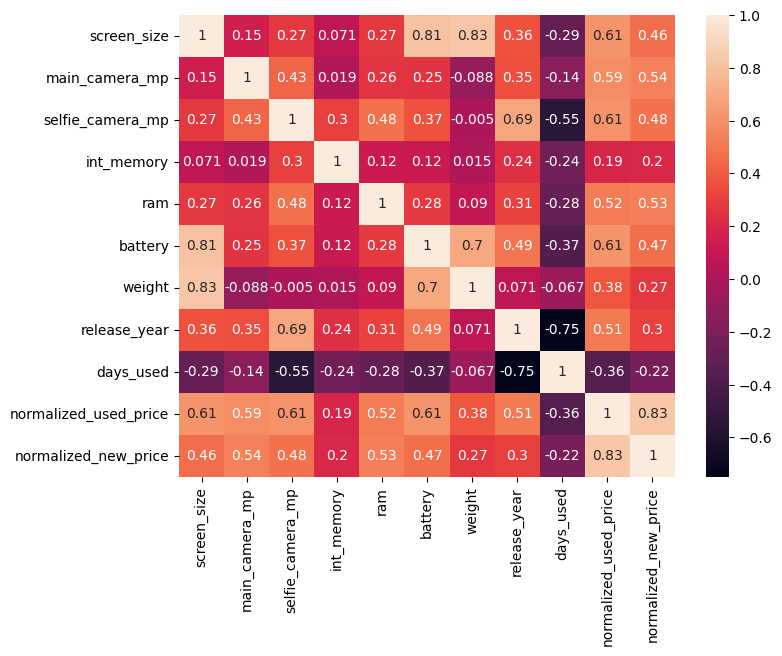

In [26]:
corr_matrix = df.corr(numeric_only=True)

sns.heatmap(corr_matrix, annot=True)

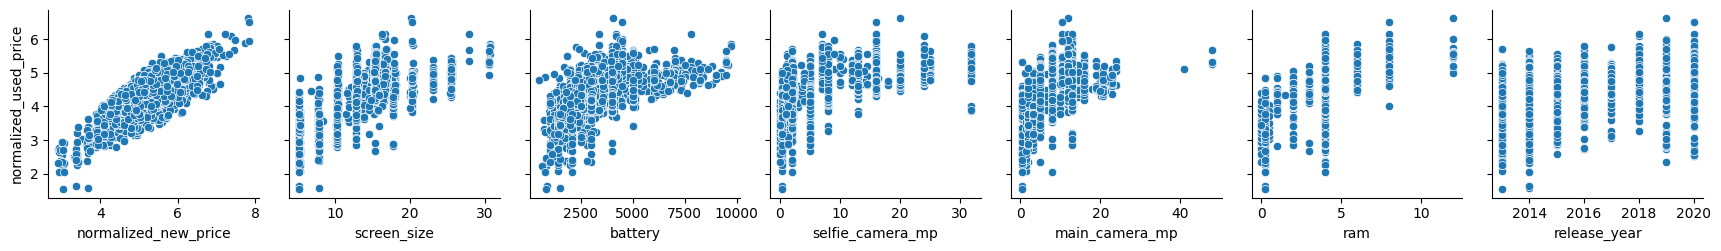

In [27]:
# display scatterplots between normalized_used_price and highest correlated variables
# plots in order from most correlated to least correlated
g = sns.pairplot(data=df, x_vars=['normalized_new_price','screen_size','battery','selfie_camera_mp',
                                  'main_camera_mp','ram','release_year'],
                 y_vars='normalized_used_price')
plt.show()

* Normalized used price has a strong positive correlatation with the normalized new price.
* Screen size, battery, and camera mp all show fairly strong positive correlation with normalized used price.
* Ram and release year also show a positive correlation with normalized used price.
* There is a slight negative correlation with days used and is the only negatively correlated variable.

## Data Preprocessing

### Missing value treatment

In [28]:
# check for null values
df.isna().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

**Fill na values first by grouping brand and release year**

In [29]:
# get list of columns with missing values
mvc = df.columns[df.isna().any()].tolist()

# group by brand and release year
gb = df.groupby(['brand_name', 'release_year'])

# fill in missing values with median of each group
for col in mvc:
    df[col] = gb[col].transform(lambda x: x.fillna(x.median()))

In [30]:
df.isna().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

**Fill na values by grouping only brand**

In [31]:
# group by brand
gb = df.groupby('brand_name')

# fill in missing values with median of each group
for col in mvc:
    df[col] = gb[col].transform(lambda x: x.fillna(x.median()))

In [32]:
df.isna().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

In [33]:
df[df['main_camera_mp'].isna()]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
59,Infinix,Android,17.32,yes,no,NaN,8.0,32.0,2.0,6000.0,209.0,2020,245,4.282068,4.597642
60,Infinix,Android,15.39,yes,no,NaN,8.0,64.0,4.0,5000.0,185.0,2020,173,4.363608,4.711780
61,Infinix,Android,15.39,yes,no,NaN,8.0,32.0,2.0,5000.0,185.0,2020,256,4.181439,4.505460
62,Infinix,Android,15.39,yes,no,NaN,16.0,32.0,3.0,4000.0,178.0,2019,316,4.555244,4.602166
63,Infinix,Android,15.29,yes,no,NaN,16.0,32.0,2.0,4000.0,165.0,2019,468,4.416670,4.871297
278,Infinix,Android,17.32,yes,no,NaN,8.0,32.0,2.0,6000.0,209.0,2020,320,4.405133,4.605370
279,Infinix,Android,15.39,yes,no,NaN,8.0,64.0,4.0,5000.0,185.0,2020,173,4.495913,4.702115
280,Infinix,Android,15.39,yes,no,NaN,8.0,32.0,2.0,5000.0,185.0,2020,329,4.370713,4.487287
281,Infinix,Android,15.39,yes,no,NaN,16.0,32.0,3.0,4000.0,178.0,2019,356,4.417997,4.605970
282,Infinix,Android,15.29,yes,no,NaN,16.0,32.0,2.0,4000.0,165.0,2019,497,4.423289,4.866072


* Main camera mp and selfie camera mp have a positive correlation, so we will use medians of main camera mp where selfie camera mp is the same.

In [34]:
# check median of main camera mp where selfie camera mp is 8.0
df['main_camera_mp'][df['selfie_camera_mp']==8.0].median()

13.0

In [35]:
# check median of main camera mp where selfie camera mp is 16.0
df['main_camera_mp'][df['selfie_camera_mp']==16.0].median()

13.0

* Both medians are 13.0 so we will just replace the remaining missing values with 13.0

In [36]:
df['main_camera_mp'] = df['main_camera_mp'].fillna(13.0)

In [37]:
df.isna().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

* All missing values are now filled in.

### Feature engineering

* We will change the release year to a value that we can measure as it currently a categorical variable.
* We can subtract release year from year of data collection to get the phone age at the time of data collection.

In [38]:
# get phone age by subtracting release year from year of data collection
df['phone_age'] = 2021 - df['release_year']
# drop release year column
df.drop('release_year', axis=1, inplace=True)

### Drop columns

* We can drop the brand_name column as there are too many unique values.

In [39]:
df.drop(['brand_name'], axis=1, inplace=True)
df.head()

,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,phone_age
0,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.307572,4.715100,1
1,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.162097,5.519018,1
2,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.111084,5.884631,1
3,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.135387,5.630961,1
4,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.389995,4.947837,1


### Data preparation for modeling

#### Define variables

In [40]:
# independent variables
X = df.drop(['normalized_used_price'], axis=1)
# dependent variables
y = df['normalized_used_price']

In [41]:
X.head()

,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,phone_age
0,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,1
1,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,1
2,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,1
3,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,1
4,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,1


In [42]:
y.head()

0    4.307572
1    5.162097
2    5.111084
3    5.135387
4    4.389995
Name: normalized_used_price, dtype: float64

In [43]:
# add the intercept to data
X = sm.add_constant(X)

#### Get dummy variables

In [44]:
# get dummy variables for categorical variables
X = pd.get_dummies(X,
                   columns=X.select_dtypes(include=['object','category']).columns.tolist(),
                   drop_first=True,
                   dtype=int
)
X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,phone_age,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,1,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,1,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,1,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,1,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,1,0,0,0,1,0


#### Split X and y into train and test sets in 70:30 ratio

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1
)

In [46]:
X_train.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,phone_age,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
3026,1.0,10.29,8.0,0.3,16.0,4.0,1800.0,120.0,819,4.796204,7,0,0,0,0,0
1525,1.0,15.34,13.0,5.0,32.0,4.0,4050.0,225.0,585,5.434595,5,0,0,0,1,0
1128,1.0,12.70,13.0,5.0,32.0,4.0,2550.0,162.0,727,5.137914,6,0,0,0,0,0
3003,1.0,12.83,8.0,5.0,16.0,4.0,3200.0,126.0,800,5.189228,6,0,0,0,1,0
2907,1.0,12.88,13.0,16.0,16.0,4.0,2900.0,160.0,560,5.016220,4,0,0,0,1,0


In [47]:
X_test.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,phone_age,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
866,1.0,15.24,8.00,2.0,16.0,4.00,3000.0,206.0,632,5.190788,7,0,0,0,0,0
957,1.0,10.16,3.15,0.3,512.0,0.25,1400.0,140.0,637,3.884652,8,0,0,0,0,0
280,1.0,15.39,13.00,8.0,32.0,2.00,5000.0,185.0,329,4.487287,1,0,0,0,1,0
2150,1.0,12.83,13.00,16.0,64.0,4.00,3200.0,148.0,648,5.639422,4,0,0,0,1,0
93,1.0,15.29,13.00,5.0,32.0,3.00,3500.0,179.0,216,5.300415,2,0,0,0,1,0


## Revisiting EDA

<Axes: >

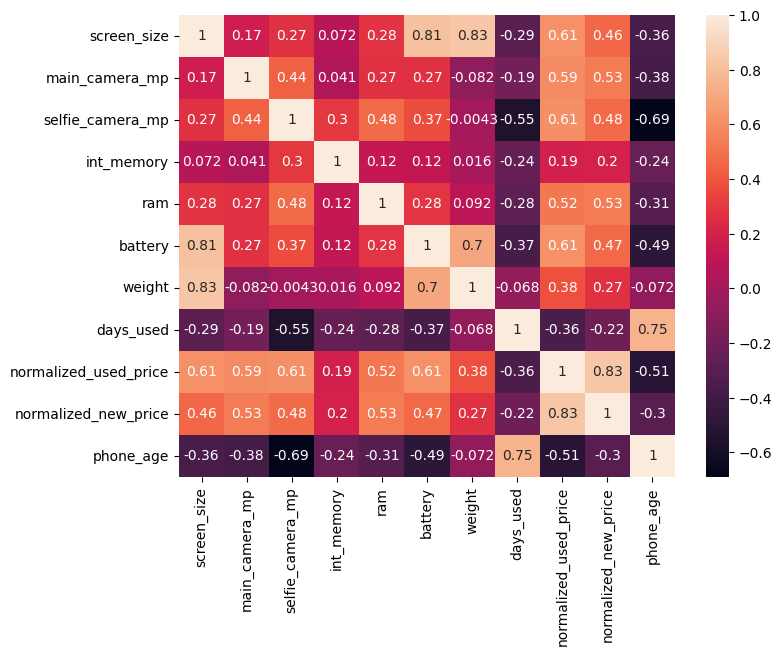

In [48]:
corr_matrix = df.corr(numeric_only=True)

sns.heatmap(corr_matrix, annot=True)

* Phone age has a high negative correlation with selfie camera MP
* Screen size has high positive correlation with battery and weight
* Weight has a high positive correlation with battery

<Axes: xlabel='os', ylabel='main_camera_mp'>

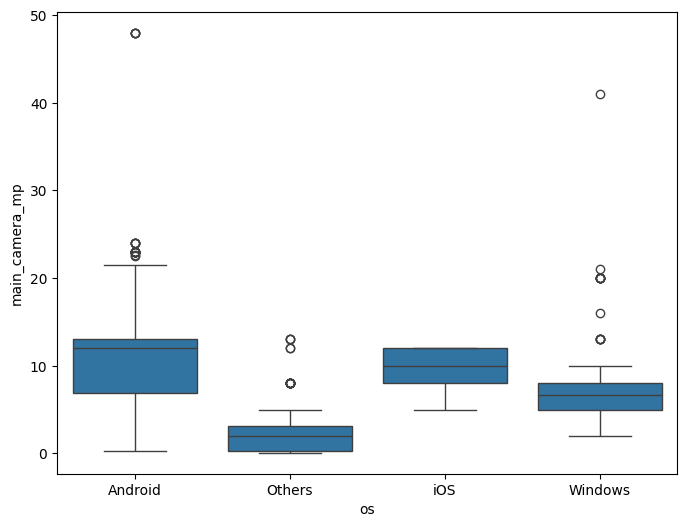

In [49]:
sns.boxplot(data=df, x='os', y='main_camera_mp')

<Axes: xlabel='os', ylabel='selfie_camera_mp'>

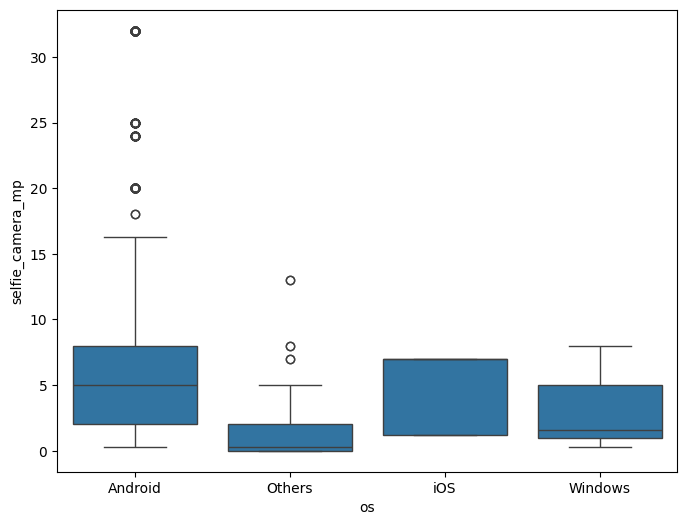

In [50]:
sns.boxplot(data=df, x='os', y='selfie_camera_mp')

* Android phones, on average, have higher MP cameras

<Axes: xlabel='os', ylabel='ram'>

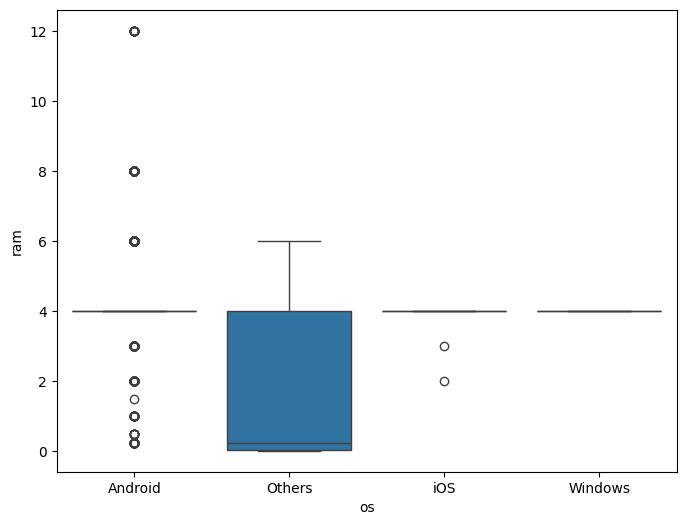

In [51]:
sns.boxplot(data=df, x='os', y='ram')

* Android phones have a high amount of outliers with both high and low amounts of ram
* iOS and Windows phones don't have higher than 4gb RAM

## Model Building - Linear Regression

In [52]:
olsmod = sm.OLS(y_train, X_train).fit()
print(olsmod.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.841
Method:                    Least Squares   F-statistic:                     851.7
Date:                   Sun, 26 May 2024   Prob (F-statistic):               0.00
Time:                           09:50:26   Log-Likelihood:                 99.979
No. Observations:                   2417   AIC:                            -168.0
Df Residuals:                       2401   BIC:                            -75.31
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

* Our R-squared is **0.842**

## Model Performance Check

In [53]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [54]:
# checking model performance on train set (seen 70% data)
print("Training Performance:")
olsmodel_train_perf = model_performance_regression(olsmod, X_train, y_train)
olsmodel_train_perf

Training Performance:


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.232166,0.182087,0.841791,0.840736,4.373119


In [55]:
# checking model performance on test set (seen 30% data)
print("Test Performance:")
olsmod_test_perf = model_performance_regression(olsmod, X_test, y_test)
olsmod_test_perf

Test Performance:


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.236514,0.182963,0.844907,0.842474,4.46636


## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

1. **No multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No heteroscedasticity**

### Check for multicolinearity

In [57]:
# check VIF of predictors
vif = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns
)
print(vif)

const                   123.982448
screen_size               7.244973
main_camera_mp            2.000921
selfie_camera_mp          2.576048
int_memory                1.248268
ram                       2.118064
battery                   3.855152
weight                    6.135396
days_used                 2.576639
normalized_new_price      2.623751
phone_age                 4.627616
os_Others                 1.485416
os_Windows                1.023357
os_iOS                    1.089074
4g_yes                    2.259946
5g_yes                    1.722541
dtype: float64


* Focus on variables with VIF > 5
* Drop one-by-one to see how it affects R-squared

In [54]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

R-squared: 0.838 
Adjusted R-squared: 0.837


* Removing **screen_size** changed R-squared from 0.842 to **0.838**, a **0.014** change

In [55]:
X_train3 = X_train.drop(['weight'], axis=1)
olsmod3 = sm.OLS(y_train, X_train3).fit()
print(
    'R-squared:',
    np.round(olsmod3.rsquared, 3),
    '\nAdjusted R-squared:',
    np.round(olsmod3.rsquared_adj, 3)
)

R-squared: 0.838 
Adjusted R-squared: 0.837


* Removing **weight** changed R-squared from 0.842 to **0.838**, a **0.014** change

#### Drop screen_size

In [56]:
# drop screen_size from training set
X_train.drop(['screen_size'], axis=1, inplace=True)
# update model summary
olsmod = sm.OLS(y_train, X_train).fit()
# print updated R-squared
print('R-squared:', np.round(olsmod.rsquared, 3))

R-squared: 0.838


#### Recheck VIF values

In [57]:
# check VIF of predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns
)
print(vif)

const                   103.741993
main_camera_mp            1.996931
selfie_camera_mp          2.571145
int_memory                1.247637
ram                       2.117567
battery                   3.617277
weight                    2.884289
days_used                 2.564415
normalized_new_price      2.593391
phone_age                 4.473062
os_Others                 1.265475
os_Windows                1.023299
os_iOS                    1.086690
4g_yes                    2.259209
5g_yes                    1.719101
dtype: float64


* Since the variable phone_age has a VIF close to 5, we will try removing it to see how it affects our R-squared.

In [58]:
X_train4 = X_train.drop(['phone_age'], axis=1)
olsmod4 = sm.OLS(y_train, X_train4).fit()
print(
    'R-squared:',
    np.round(olsmod4.rsquared, 3),
    '\nAdjusted R-squared:',
    np.round(olsmod4.rsquared_adj, 3)
)

R-squared: 0.835 
Adjusted R-squared: 0.834


* There is a very small change in R-squared (0.003), however since the VIF of phone_age was under 5, we will leave it in.

#### Review updated model summary

In [59]:
print(olsmod.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.838
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     887.2
Date:                   Wed, 22 May 2024   Prob (F-statistic):               0.00
Time:                           20:45:34   Log-Likelihood:                 70.974
No. Observations:                   2417   AIC:                            -111.9
Df Residuals:                       2402   BIC:                            -25.09
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

#### Check for high p-value variables

**For any variable with p-value > 0.05:**
1. Drop variable with highest p-value
2. Rebuild model without dropped variable
3. Repeat until there are no variables with p-value > 0.05

In [60]:
X_train.drop(['battery'], axis=1, inplace=True)
olsmod = sm.OLS(y_train, X_train).fit()
print(olsmod.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.838
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     955.8
Date:                   Wed, 22 May 2024   Prob (F-statistic):               0.00
Time:                           20:45:34   Log-Likelihood:                 70.972
No. Observations:                   2417   AIC:                            -113.9
Df Residuals:                       2403   BIC:                            -32.88
Df Model:                             13                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [61]:
X_train.drop(['os_Windows'], axis=1, inplace=True)
olsmod = sm.OLS(y_train, X_train).fit()
print(olsmod.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.838
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     1036.
Date:                   Wed, 22 May 2024   Prob (F-statistic):               0.00
Time:                           20:45:34   Log-Likelihood:                 70.753
No. Observations:                   2417   AIC:                            -115.5
Df Residuals:                       2404   BIC:                            -40.23
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [62]:
X_train.drop(['days_used'], axis=1, inplace=True)
olsmod = sm.OLS(y_train, X_train).fit()
print(olsmod.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.838
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     1130.
Date:                   Wed, 22 May 2024   Prob (F-statistic):               0.00
Time:                           20:45:34   Log-Likelihood:                 70.211
No. Observations:                   2417   AIC:                            -116.4
Df Residuals:                       2405   BIC:                            -46.94
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [63]:
X_train.drop(['int_memory'], axis=1, inplace=True)
olsmod = sm.OLS(y_train, X_train).fit()
print(olsmod.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.838
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     1242.
Date:                   Wed, 22 May 2024   Prob (F-statistic):               0.00
Time:                           20:45:34   Log-Likelihood:                 69.406
No. Observations:                   2417   AIC:                            -116.8
Df Residuals:                       2406   BIC:                            -53.12
Df Model:                             10                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [64]:
X_train.drop(['os_iOS'], axis=1, inplace=True)
olsmod = sm.OLS(y_train, X_train).fit()
print(olsmod.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.838
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     1379.
Date:                   Wed, 22 May 2024   Prob (F-statistic):               0.00
Time:                           20:45:34   Log-Likelihood:                 67.943
No. Observations:                   2417   AIC:                            -115.9
Df Residuals:                       2407   BIC:                            -57.98
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [65]:
X_train.drop(['5g_yes'], axis=1, inplace=True)
olsmod = sm.OLS(y_train, X_train).fit()
print(olsmod.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.837
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     1549.
Date:                   Wed, 22 May 2024   Prob (F-statistic):               0.00
Time:                           20:45:34   Log-Likelihood:                 66.259
No. Observations:                   2417   AIC:                            -114.5
Df Residuals:                       2408   BIC:                            -62.41
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [66]:
# remove dropped columns from test set
predictors = X_train.columns.tolist()
X_test = X_test[predictors]

#### Recheck model performance

In [67]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmod, X_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.235427,0.184203,0.837315,0.836706,4.430047


In [68]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod_test_perf = model_performance_regression(olsmod, X_test, y_test)
olsmod_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.240692,0.185974,0.839379,0.837972,4.542154


**Observations**

* Our model has no variables with a p-value of over 0.05
* Adjusted R-squared is 0.837, so our model explains 83.7% of the variance
* We started out with an adjusted R-squared of 0.842, so the dropped variables did not have much affect on our model
* RMSE and MAE values are comparable for train and test sets, indicating that the model is not overfitting

### Linearity of variables

In [69]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.867504,0.219984
1525,4.448399,4.595450,-0.147051
1128,4.315353,4.289224,0.026128
3003,4.282068,4.188068,0.094000
2907,4.456438,4.495376,-0.038938


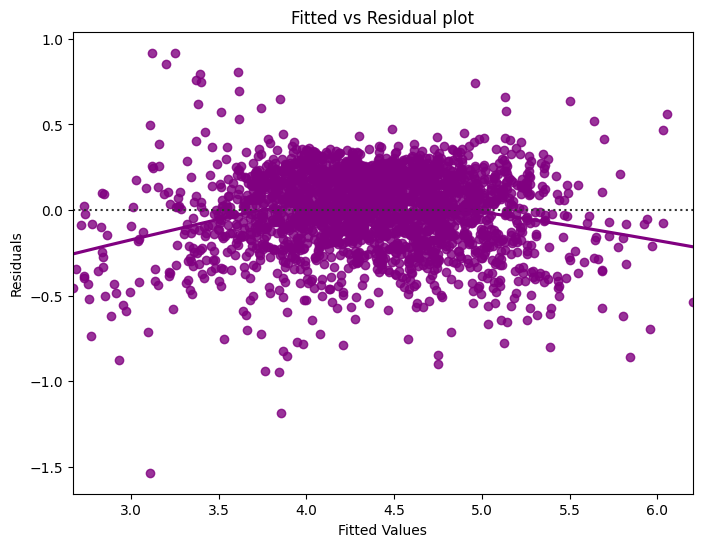

In [70]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* There is no clear pattern, so the assumptions of linearity and independence are satisfied

### Test for normality

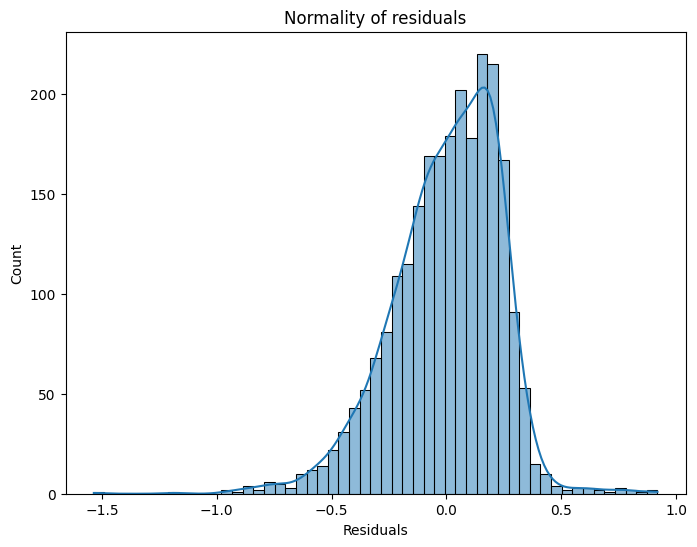

In [71]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

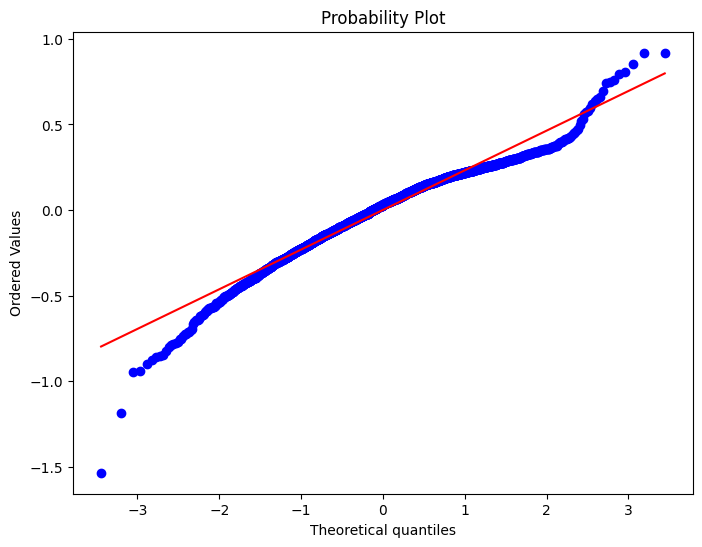

In [72]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

In [73]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.966847492431251, pvalue=3.618889669963657e-23)

* p-value < 0.05, so residuals are not normal
* However, as an approximation, we can accept this distribution as normal

### Test for homoscedasity

In [74]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train)
lzip(name, test)

[('F statistic', 1.0312151441227846), ('p-value', 0.2973033975984892)]

* p-value > 0.05, so residuals are homeoscedastic, thus the assumption is satisfied

## Predictions on Test Data

In [75]:
# predictions on the test set
pred = olsmod.predict(X_test)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.386933
2341,3.696103,4.003429
1913,3.592093,3.646615
688,4.306495,4.098564
650,4.522115,5.174363
2291,4.259294,4.394856
40,4.997685,5.435129
1884,3.875359,4.050002
2538,4.206631,4.062151
45,5.380450,5.269239


* The results are acceptable, as the predicted values are close to the actual values

## Final Model

In [76]:
X_train_final = X_train.copy()
X_test_final = X_test.copy()

olsmod_final = sm.OLS(y_train, X_train_final).fit()
print(olsmod_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.837
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     1549.
Date:                   Wed, 22 May 2024   Prob (F-statistic):               0.00
Time:                           20:45:35   Log-Likelihood:                 66.259
No. Observations:                   2417   AIC:                            -114.5
Df Residuals:                       2408   BIC:                            -62.41
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [79]:
# checking model performance on train set (seen 70% data)
print('Training Performance:')
olsmod_final_train_perf = model_performance_regression(
    olsmod_final, X_train_final, y_train
)
olsmod_final_train_perf

Training Performance:


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.235427,0.184203,0.837315,0.836706,4.430047


In [80]:
# checking model performance on test set (seen 30% data)
print('Test Performance:')
olsmod_final_test_perf = model_performance_regression(
    olsmod_final, X_test_final, y_test
)
olsmod_final_test_perf

Test Performance:


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.240692,0.185974,0.839379,0.837972,4.542154


## Actionable Insights and Recommendations

* The model is able to explain 84% of the variation in the data and within 4.5% of used prices on the test data.
* This is excellent and shows that this model is great for prediction.
* With all other variables held constant, one unit of main camera megapixels increases used price by 0.022
* With all other variables held constant, one unit of selfie camera megapixels increases used price by 0.0145
* With all other variables held constant, one unit of RAM increases used price by 0.0171
* With all other variables held constant, one unit of weight increases used price by 0.0017
* Every unit of the phones new price, increases used price by 0.4275. A good baseline used price can be set by taking 43% of the phone's original MSRP.
* Focus on camera MP, RAM, and weight of the phone when deciding on setting the used price.
* Huawei, Vivo, Oppo, Xiaomi, and Samsungs phones will have good resell value as they are popular brands with high megapixel selfie cameras.
* OnePlus phones will have good resell value as they have the highest average RAM out of the brands of phones in the dataset.

___